In [ ]:
!pip install scikit-learn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM,Dense

In [ ]:
data=np.array([i for i in range(100)])  #[0,1,2,3,4,5..]
data=data.reshape(-1,1)  #[[0],[1],[2]....]
scaler=MinMaxScaler(feature_range=(0,1))
data_scaled=scaler.fit_transform(data)

In [ ]:
def create_sequences(data,time_steps=5):
  X,y=[],[]
  for i in range(len(data)-time_steps):
    X.append(data[i:i+time_steps])
    y.append(data[i+time_steps])
  return np.array(X),np.array(y)

time_steps=5
X,y=create_sequences(data_scaled,time_steps)
X=X.reshape((X.shape[0],X.shape[1],1))

split=int(len(X)*0.8)
X_train,X_test=X[:split],X[split:]
y_train,y_test=y[:split],y[split:]

model=Sequential([LSTM(50,return_sequences=False,input_shape=(time_steps,1)),
                  Dense(1)])
model.compile(optimizer='adam',loss='mse')
model.fit(X_train,y_train,epochs=20,batch_size=1,verbose=1)

Epoch 1/20


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


396/396 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - loss: 0.0271
Epoch 2/20
396/396 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.0320e-04
Epoch 3/20
396/396 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 2.3784e-05
Epoch 4/20
396/396 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 4.3553e-06
Epoch 5/20
396/396 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 1.1729e-06
Epoch 6/20
396/396 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 2.1593e-06
Epoch 7/20
396/396 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 6.0305e-06
Epoch 8/20
396/396 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 1.3844e-05
Epoch 9/20
396/396 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 5.6229e-06
Epoch 10/20
396/396 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 7.9589e-06
Epoch 11/20
396/396 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 1.2454e-05
Epoch 12/20
396/396 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 2.8647e-05
Epoch 13/20
396/396 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 7.3062e-05
Epoch 14/20
396/396 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 6.3427e-06
Epoch 15/20
396/

In [ ]:
y_pred=model.predict(X_test)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


In [ ]:
y_test.shape

(99, 1)

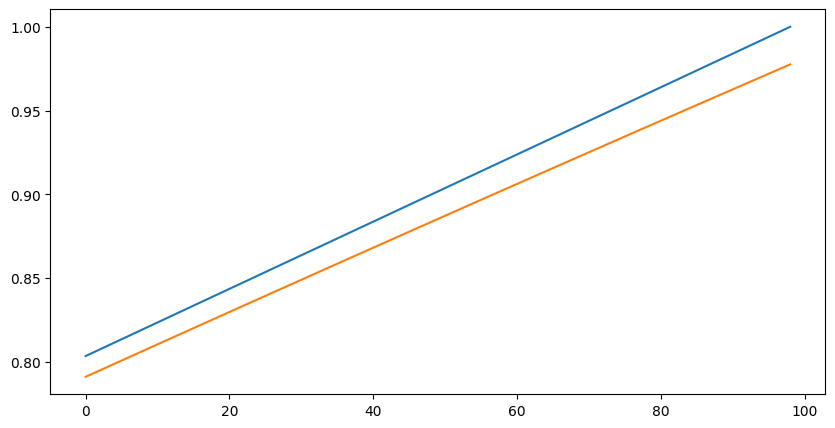

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(y_test,label='Actual')
plt.plot(y_pred,label='Predicted')
plt.show()



In [ ]:
print(y_test)
print(y_pred)

[[0.80360721]
 [0.80561122]
 [0.80761523]
 [0.80961924]
 [0.81162325]
 [0.81362725]
 [0.81563126]
 [0.81763527]
 [0.81963928]
 [0.82164329]
 [0.82364729]
 [0.8256513 ]
 [0.82765531]
 [0.82965932]
 [0.83166333]
 [0.83366733]
 [0.83567134]
 [0.83767535]
 [0.83967936]
 [0.84168337]
 [0.84368737]
 [0.84569138]
 [0.84769539]
 [0.8496994 ]
 [0.85170341]
 [0.85370741]
 [0.85571142]
 [0.85771543]
 [0.85971944]
 [0.86172345]
 [0.86372745]
 [0.86573146]
 [0.86773547]
 [0.86973948]
 [0.87174349]
 [0.87374749]
 [0.8757515 ]
 [0.87775551]
 [0.87975952]
 [0.88176353]
 [0.88376754]
 [0.88577154]
 [0.88777555]
 [0.88977956]
 [0.89178357]
 [0.89378758]
 [0.89579158]
 [0.89779559]
 [0.8997996 ]
 [0.90180361]
 [0.90380762]
 [0.90581162]
 [0.90781563]
 [0.90981964]
 [0.91182365]
 [0.91382766]
 [0.91583166]
 [0.91783567]
 [0.91983968]
 [0.92184369]
 [0.9238477 ]
 [0.9258517 ]
 [0.92785571]
 [0.92985972]
 [0.93186373]
 [0.93386774]
 [0.93587174]
 [0.93787575]
 [0.93987976]
 [0.94188377]
 [0.94388778]
 [0.94

In [ ]:
test_input=np.array([95,96,97,98,99]).reshape(1,time_steps,1)
test_input_scaled=scaler.transform(test_input.reshape(-1,1)).reshape(1,time_steps,1)
predicted_value_scaled=model.predict(test_input_scaled)
predicted_value=scaler.inverse_transform(predicted_value_scaled.reshape(-1,1))
print(predicted_value[0][0])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
94.747284
